<font size="7"><span style="color: #33D6CC;">MODELOS BRUTOS</span></font>

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import sklearn.metrics
from sklearn.impute import SimpleImputer

# Preprocesamiento Simple

In [126]:
df = pd.read_csv('tenis_bruto.csv')
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193332,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4.0,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
193333,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
193334,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
193335,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


In [127]:
# Borrar minutes faltantes 
df.dropna(subset='minutes',inplace=True)

In [128]:
    # borrar NextGen: mecanismo del torneo diferente 
df = df[~df['tourney_name'].str.startswith('NextGen', na=False)]

In [129]:
    # Eliminar los partidos walkover 
df = df[df['score']!='W/O']
df = df[df['score']!=' W/O']
df = df[df['score']!=' RET']
df.shape

(93532, 49)

In [130]:
    # eliminar partidos de retirados,walkover o descalificados en score
df = df[~df['score'].str.contains('RET', na=False)]
df = df[~df['score'].str.contains('DEF', na=False)]
df = df[~df['score'].str.contains('Def.', na=False)]
df[df['score'].str.contains(' W/O', na=False)]['score']
df.shape

(91006, 49)

In [131]:
    #rondas a numérica
rondas = {'R128':128,'R64':64,'R32':32,'R16':16,'QF':8,'SF':4,'F':2}
df['round'] = df['round'].map(rondas)

In [132]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [133]:
    #eliminar columnas no utilizables
columnas=['tourney_id',
          'tourney_name',
          'winner_id',
          'winner_name',
          'loser_name',
          'winner_ioc',
          'loser_ioc',
          'match_num',
          'winner_id',
          'winner_seed',
          'winner_entry',
          'loser_id',
          'loser_seed',
          'loser_entry',
          'w_ace',
          'w_df',
          'w_svpt',
          'w_1stIn',
          'w_1stWon',
          'w_2ndWon',
          'w_SvGms',
          'w_bpSaved',
          'w_bpFaced',
          'l_ace',
          'l_df',
          'l_svpt',
          'l_1stIn',
          'l_1stWon',
          'l_2ndWon',
          'l_SvGms',
          'l_bpSaved',
          'l_bpFaced',
          'score'
              ]

df.drop(columns=columnas,inplace= True)
df

,surface,draw_size,tourney_level,tourney_date,winner_hand,winner_ht,winner_age,loser_hand,loser_ht,loser_age,best_of,round,minutes,winner_rank,winner_rank_points,loser_rank,loser_rank_points
17897,Grass,64.0,A,19720117,R,183.0,19.7,R,173.0,34.5,3,32.0,140.0,NaN,NaN,NaN,NaN
26849,Carpet,32.0,A,19750224,R,185.0,35.7,U,NaN,NaN,3,32.0,25.0,72.0,NaN,NaN,NaN
26865,Carpet,32.0,A,19750224,L,183.0,33.3,R,178.0,22.8,3,2.0,135.0,41.0,NaN,55.0,NaN
73970,Clay,56.0,A,19870427,R,188.0,27.1,R,190.0,22.9,5,2.0,136.0,1.0,NaN,5.0,NaN
86621,Hard,32.0,A,19901231,R,193.0,20.7,R,190.0,23.1,3,32.0,130.0,56.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193332,Clay,4.0,D,20240203,U,NaN,18.8,U,NaN,21.8,3,NaN,77.0,1109.0,8.0,740.0,34.0
193333,Hard,4.0,D,20240202,R,NaN,26.9,R,NaN,23.2,3,NaN,131.0,554.0,67.0,748.0,32.0
193334,Hard,4.0,D,20240202,U,NaN,27.3,R,183.0,26.4,3,NaN,131.0,416.0,109.0,NaN,NaN
193335,Hard,4.0,D,20240202,R,NaN,26.9,U,NaN,27.3,3,NaN,159.0,554.0,67.0,416.0,109.0


In [134]:
df.columns

Index(['surface', 'draw_size', 'tourney_level', 'tourney_date', 'winner_hand',
       'winner_ht', 'winner_age', 'loser_hand', 'loser_ht', 'loser_age',
       'best_of', 'round', 'minutes', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points'],
      dtype='object')

In [135]:
    # OneHotEncoder ['surface', 'tourney_level', 'winner_hand','loser_hand']

from sklearn.preprocessing import OneHotEncoder

    #crear objeto
encoder = OneHotEncoder(sparse_output=False, #por defecto el formato el formato es sparse
                        drop=None, # no creamos una nueva columna con la primera categoria que encuentra
                        handle_unknown='ignore') #ignorar nuevas categorias 

    #entrenar objeto
encoder.fit(df[['surface', 'tourney_level', 'winner_hand','loser_hand']])

    #Transformacion --> array
encoder.transform(df[['surface', 'tourney_level', 'winner_hand','loser_hand']])

    #
nombre_columnas= encoder.get_feature_names_out(['surface', 'tourney_level', 'winner_hand','loser_hand'])

    #
df[nombre_columnas] = encoder.transform(df[['surface', 'tourney_level', 'winner_hand','loser_hand']])

    #
df = df.drop(columns=['surface', 'tourney_level', 'winner_hand','loser_hand'])

In [136]:
df.columns

Index(['draw_size', 'tourney_date', 'winner_ht', 'winner_age', 'loser_ht',
       'loser_age', 'best_of', 'round', 'minutes', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'surface_Carpet', 'surface_Clay', 'surface_Grass', 'surface_Hard',
       'tourney_level_A', 'tourney_level_D', 'tourney_level_F',
       'tourney_level_G', 'tourney_level_M', 'winner_hand_A', 'winner_hand_L',
       'winner_hand_R', 'winner_hand_U', 'winner_hand_nan', 'loser_hand_A',
       'loser_hand_L', 'loser_hand_R', 'loser_hand_U', 'loser_hand_nan'],
      dtype='object')

In [137]:
    #los faltantes por la media 
from sklearn.impute import SimpleImputer
columns=df.columns

imputer = SimpleImputer (missing_values=np.nan, strategy="mean")

df[columns] = imputer.fit_transform(df[columns])

df

,draw_size,tourney_date,winner_ht,winner_age,loser_ht,loser_age,best_of,round,minutes,winner_rank,...,winner_hand_A,winner_hand_L,winner_hand_R,winner_hand_U,winner_hand_nan,loser_hand_A,loser_hand_L,loser_hand_R,loser_hand_U,loser_hand_nan
17897,64.0,19720117.0,183.000000,19.7,173.000000,34.500000,3.0,32.000000,140.0,64.285802,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26849,32.0,19750224.0,185.000000,35.7,185.257876,26.038325,3.0,32.000000,25.0,72.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26865,32.0,19750224.0,183.000000,33.3,178.000000,22.800000,3.0,2.000000,135.0,41.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73970,56.0,19870427.0,188.000000,27.1,190.000000,22.900000,5.0,2.000000,136.0,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
86621,32.0,19901231.0,193.000000,20.7,190.000000,23.100000,3.0,32.000000,130.0,56.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193332,4.0,20240203.0,185.815849,18.8,185.257876,21.800000,3.0,39.517367,77.0,1109.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
193333,4.0,20240202.0,185.815849,26.9,185.257876,23.200000,3.0,39.517367,131.0,554.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
193334,4.0,20240202.0,185.815849,27.3,183.000000,26.400000,3.0,39.517367,131.0,416.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
193335,4.0,20240202.0,185.815849,26.9,185.257876,27.300000,3.0,39.517367,159.0,554.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [138]:
df.isnull().sum()

draw_size             0
tourney_date          0
winner_ht             0
winner_age            0
loser_ht              0
loser_age             0
best_of               0
round                 0
minutes               0
winner_rank           0
winner_rank_points    0
loser_rank            0
loser_rank_points     0
surface_Carpet        0
surface_Clay          0
surface_Grass         0
surface_Hard          0
tourney_level_A       0
tourney_level_D       0
tourney_level_F       0
tourney_level_G       0
tourney_level_M       0
winner_hand_A         0
winner_hand_L         0
winner_hand_R         0
winner_hand_U         0
winner_hand_nan       0
loser_hand_A          0
loser_hand_L          0
loser_hand_R          0
loser_hand_U          0
loser_hand_nan        0
dtype: int64

In [121]:
X =df.drop(columns='minutes')
y =df['minutes']

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# PYCARET

In [ ]:
pip install --upgrade  pycaret

In [ ]:
pip install --upgrade pip

In [17]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [139]:
# import pycaret regression and init setup
from pycaret.regression import RegressionExperiment
from pycaret.regression import setup
exp = RegressionExperiment()

In [140]:
# 1. Importar las bibliotecas necesarias
from pycaret.regression import *

# 2. Cargar el conjunto de datos (usaremos un conjunto de datos de ejemplo de PyCaret)

data = df

# 3. Ejecutar la función setup() con los parámetros necesarios
exp_reg = setup(data=data, target='minutes', session_id=123)

# 4. Comparar todos los modelos disponibles y seleccionar el mejor
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,minutes
2,Target type,Regression
3,Original data shape,"(91006, 32)"
4,Transformed data shape,"(91006, 32)"
5,Transformed train set shape,"(63704, 32)"
6,Transformed test set shape,"(27302, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,25.9737,1060.0401,32.5446,0.3001,0.2990,0.2686,0.3290
catboost,CatBoost Regressor,25.9544,1061.0859,32.5598,0.2994,0.2988,0.2679,4.6400
gbr,Gradient Boosting Regressor,26.0469,1064.9073,32.6189,0.2969,0.2999,0.2698,2.1530
ridge,Ridge Regression,26.2920,1088.6851,32.9817,0.2811,0.3032,0.2724,0.0590
lr,Linear Regression,26.3032,1089.8593,32.9995,0.2804,0.3034,0.2724,1.1840
br,Bayesian Ridge,26.3028,1090.4169,33.0078,0.2800,0.3034,0.2723,0.0990
xgboost,Extreme Gradient Boosting,26.2439,1093.5905,33.0564,0.2779,0.3027,0.2705,0.2890
rf,Random Forest Regressor,26.4223,1095.9458,33.0930,0.2762,0.3044,0.2749,10.4150
lasso,Lasso Regression,26.4243,1100.8862,33.1674,0.2730,0.3049,0.2744,0.8300
llar,Lasso Least Angle Regression,26.4243,1100.8860,33.1674,0.2730,0.3049,0.2744,0.0610


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

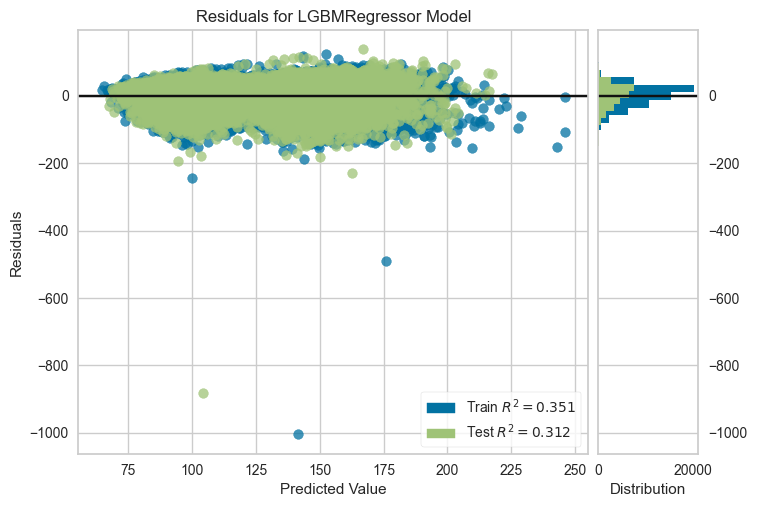

In [141]:
plot_model(best_model, plot = 'residuals')

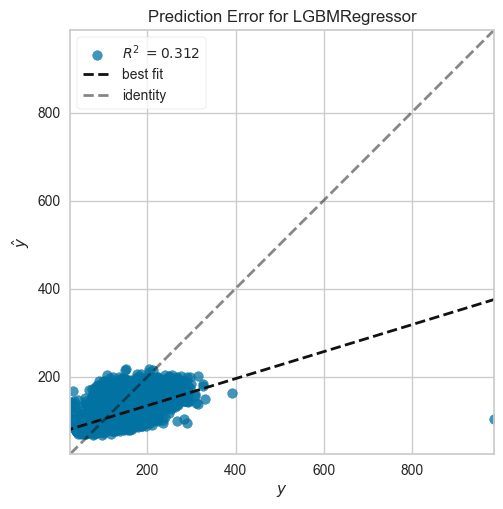

In [142]:
plot_model(best_model, plot = 'error')

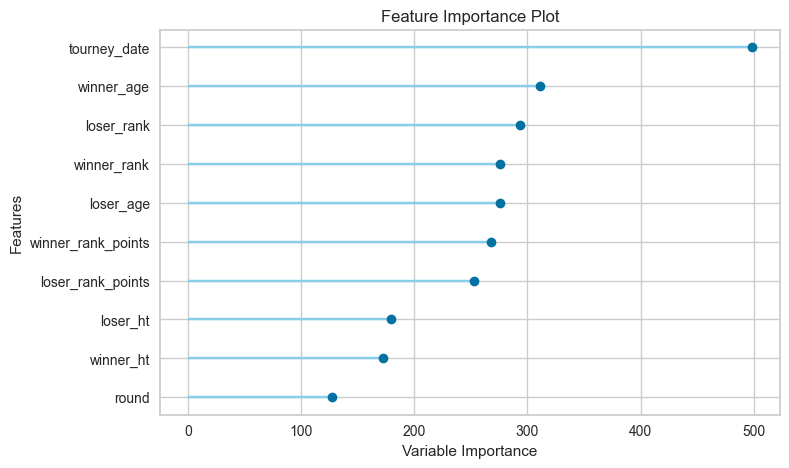

In [143]:
# plot feature importance
plot_model(best_model, plot = 'feature')